# MI 1 (2021): Exercise sheet 2

### Exercise H2.1: Connectionist Neuron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### a)

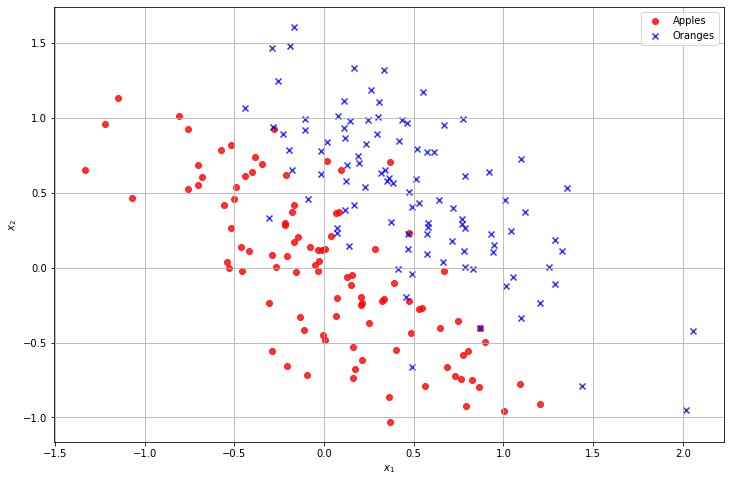

In [3]:
data = np.genfromtxt(fname='applesOranges.csv', delimiter=',', 
                              dtype=np.float, skip_header=1)

x = data[:,:2]
x1 = x[:,0]
x2 = x[:,1]
y = data[:,-1]

plt.figure(figsize = (12,8)) 
plt.scatter(x1[y==0],x2[y==0], marker = 'o', color = 'r', label = 'Apples', alpha = 0.8)
plt.scatter(x1[y==1],x2[y==1], marker = 'x', color = 'b', label = 'Oranges', alpha = 0.8)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid()
plt.show()

##### b)

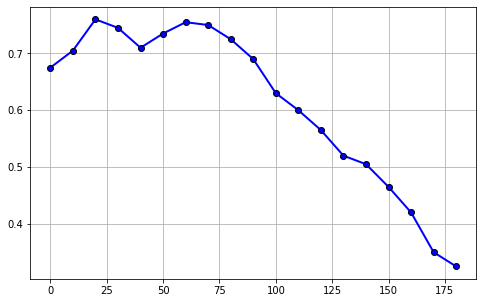

In [4]:
# theta = 0

angles = np.arange(0,190,10)
w_list = np.array([np.array([np.cos(np.radians(gamma)), np.sin(np.radians(gamma))]) 
                   for gamma in angles])

rho_list = np.zeros(19)

for (i,w) in enumerate(w_list):
    
    h_examples = w.dot(x.T)
    predictions = [1 if h >= 0 else 0 for h in h_examples]
    rho = sum(predictions == y)/len(y)
    rho_list[i] = rho
    
plt.figure(figsize = (8,5))
plt.plot(angles, rho_list, 'bo-', lw = 2, mec = 'black')
plt.grid()
plt.show()

##### c)

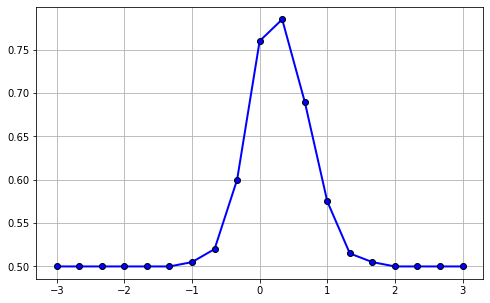

In [5]:
w_opt = w_list[np.where(rho_list == max(rho_list))][0]

theta_list = np.linspace(-3,3,19)

rho_list_t = np.zeros_like(theta_list)

for (i,theta) in enumerate(theta_list):
    
    h_examples = w_opt.dot(x.T) - theta
    predictions = [1 if h >= 0 else 0 for h in h_examples]
    rho = sum(predictions == y)/len(y)
    rho_list_t[i] = rho
    
plt.figure(figsize = (8,5))
plt.plot(theta_list, rho_list_t, 'bo-', lw = 2, mec = 'black')
plt.grid()
plt.show()

theta_opt = theta_list[np.where(rho_list_t == max(rho_list_t))]

##### d)

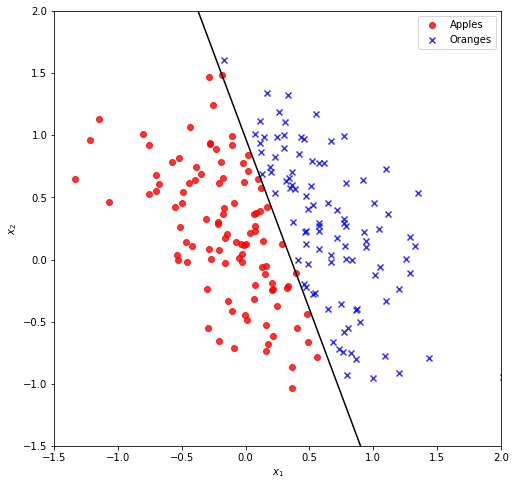

In [6]:
h_opt = w_opt.dot(x.T) - theta_opt
y_pred = np.array([1 if h >= 0 else 0 for h in h_opt])

# decision boundary 
x_db = np.linspace(-1,1)
y_db = theta_opt/w_opt[1] - x_db*w_opt[0]/w_opt[1]

plt.figure(figsize=(8,8))
plt.scatter(x1[y_pred==0],x2[y_pred==0], marker = 'o', color = 'r', label = 'Apples', alpha = 0.8)
plt.scatter(x1[y_pred==1],x2[y_pred==1], marker = 'x', color = 'b', label = 'Oranges', alpha = 0.8)
plt.plot(x_db, y_db, 'black')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-1.5,2])
plt.ylim([-1.5,2])
plt.legend()
plt.show()

##### e)

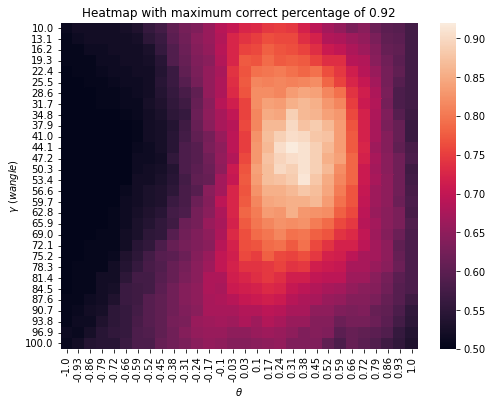

In [7]:
# grid-search
points = 30
gamma_gs = np.linspace(10,100,points)
w_gs = np.array([np.array([np.cos(np.radians(gamma)), np.sin(np.radians(gamma))]) 
                   for gamma in gamma_gs])
theta_gs = np.linspace(-1,1,points)

rho_matrix = np.zeros([points,points])

for (i,w) in enumerate(w_gs):
    for (j,theta) in enumerate(theta_gs):

        h_examples = w.dot(x.T) - theta
        predictions = [1 if h >= 0 else 0 for h in h_examples]
        rho = sum(predictions == y)/len(y)
        rho_matrix[i,j] = rho


plt.figure(figsize=(8,6))
sns.heatmap(rho_matrix, xticklabels=np.around(theta_gs,2), yticklabels=np.around(gamma_gs,1))
plt.xlabel(r"$\theta $")
plt.ylabel(r"$\gamma \ (w angle)$")
plt.title("Heatmap with maximum correct percentage of %.2f" % np.max(rho_matrix))
plt.show()

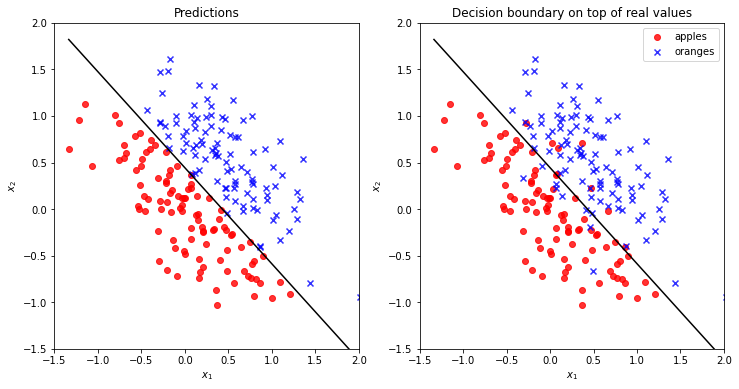

In [8]:
w_opt_pos, theta_opt_pos = np.where(rho_matrix == np.max(rho_matrix))
w_opt = w_gs[w_opt_pos][0]
theta_opt = theta_gs[theta_opt_pos][0]

h_opt = w_opt.dot(x.T) - theta_opt
y_pred = np.array([1 if h >= 0 else 0 for h in h_opt])

# decision boundary 
x_db = np.linspace(min(x1),max(x1))
y_db = theta_opt/w_opt[1] - x_db*w_opt[0]/w_opt[1]


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))

# prediction
ax1.scatter(x1[y_pred==0],x2[y_pred==0], marker = 'o', color = 'r', label = 'apples', alpha = 0.8)
ax1.scatter(x1[y_pred==1],x2[y_pred==1], marker = 'x', color = 'b', label = 'oranges', alpha = 0.8)
ax1.plot(x_db, y_db, 'black')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_xlim([-1.5,2])
ax1.set_ylim([-1.5,2])
ax1.set_title("Predictions")

# comparison with real values
ax2.scatter(x1[y==0],x2[y==0], marker = 'o', color = 'r', label = 'apples', alpha = 0.8)
ax2.scatter(x1[y==1],x2[y==1], marker = 'x', color = 'b', label = 'oranges', alpha = 0.8)
ax2.plot(x_db, y_db, 'black')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_xlim([-1.5,2])
ax2.set_ylim([-1.5,2])
ax2.set_title("Decision boundary on top of real values")

plt.legend()
plt.show()

### Exercise H2.2: Multilayer Perceptrons (MLP)

##### a)

In [9]:
class MLP():
    """Multilinear Perceptron class"""
    
    def __init__(self, w1, w2, b):
        self.w1 = w1
        self.w2 = w2
        self.b = b
    
    def output(self,x_list):
        return [self.w2.dot(np.tanh(self.w1*x - self.b)) for x in x_list]

In [10]:
N_hid = 10
N_mlp = 50

# array of mlp objects, wach with a different set of parameters
all_mlp = []

for i in range(N_mlp):
    
    # initilize random parameters
    w1 = np.random.normal(0,2,N_hid)
    w2 = np.random.normal(0,1,N_hid)
    b = 4*np.random.rand(N_hid) - 2
    
    all_mlp.append(MLP(w1,w2,b))

##### b)

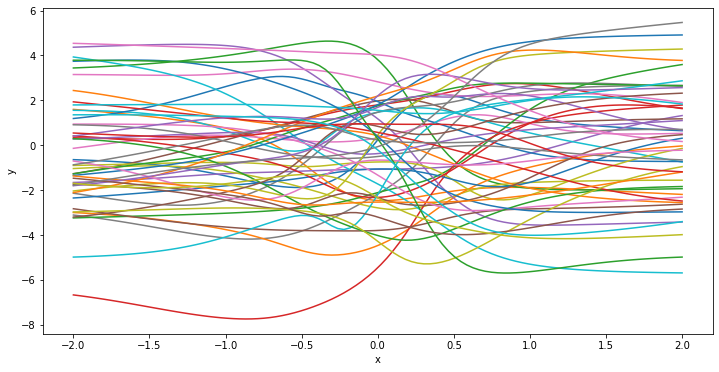

In [11]:
x = np.linspace(-2,2,100)

plt.figure(figsize=(12,6))

for i in range(N_mlp):
    
    y = all_mlp[i].output(x)
    plt.plot(x, y)
    
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##### c)

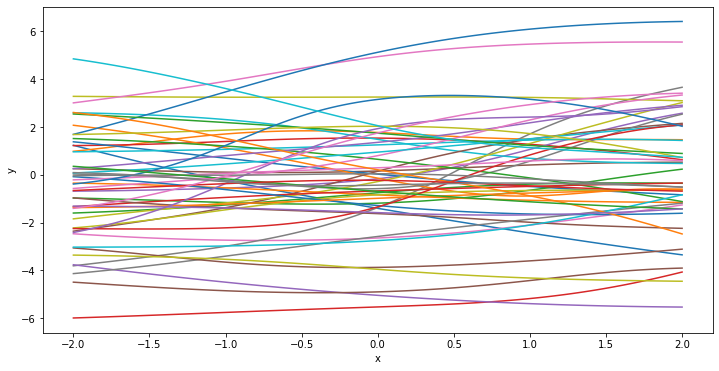

In [12]:
# array of mlp objects, wach with a different set of parameters
all_mlp_2 = []

for i in range(N_mlp):
    
    # initilize random parameters
    w1 = np.random.normal(0,.5,N_hid)
    w2 = np.random.normal(0,1,N_hid)
    b = 4*np.random.rand(N_hid) - 2
    
    all_mlp_2.append(MLP(w1,w2,b))
    
plt.figure(figsize=(12,6))

for i in range(N_mlp):
    
    y = all_mlp_2[i].output(x)
    plt.plot(x, y)
    
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##### d)